In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    [1, 0, 0, 1, 0, 0, 0, 0.3, 0.3, 0.3, 0, 13, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0.3, 0.3, 0.3, 0, 14, 1, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0.3, 0.3, 0.3, 0, 16, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0.5, 0.5, 5, 0, 0, 0 ,   0],
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0.5, 0.5, 8, 0, 0, 1,    0],
    [0, 0, 1, 1, 0, 0, 0, 0.5, 0, 0.5, 0, 9, 0, 0, 0,    0],
    [0, 0, 1, 0, 0, 1, 0, 0.5, 0, 0.5, 0, 12, 1, 0, 0,   0]
])

In [3]:
Y = np.array([
    [5],
    [3],
    [1],
    [4],
    [5],
    [1],
    [5]
])

In [4]:
def initialize_weights(X, k):
    W0 = 0
    W = np.zeros((1, X.shape[1]))
#     V = np.zeros((X.shape[1], k))
    V = np.random.normal(0, 0.0001, ((X.shape[1], k)))
    return W0, W, V

In [5]:
def forward_prop(W0, W, X, V):
    linear_term = W0 + np.dot(X, W.T)
    interactions = 0.5*np.sum((np.dot(X, V) - np.dot(X**2, V**2)), 1, keepdims=True)
#     print(interactions)
    y_hat = linear_term + interactions
    return y_hat

In [6]:
def cost_function(y, y_hat):
    m = y.shape[0]
    cost = (1/(2*m))*np.sum((y-y_hat)**2)
    return cost

In [7]:
def backprop(y, y_hat, X, V):
    first_term = np.dot(X, V)
    first_term = np.broadcast_to(first_term, (X.shape[1], V.shape[1]))
    first_term = first_term * X.T
    
    second_term = V * (X.T)**2
    
    d_interactions = first_term - second_term
    
    d_W0 = -(y - y_hat)
    
    d_W = -(y - y_hat) * X
    
    d_V = -(y - y_hat) * d_interactions
    
    return d_W0, d_W, d_V
    

In [8]:
def update_weights(w0, w, v, learning_rate, dw0, dw, dv):
    w0 -= learning_rate*dw0
    w -= learning_rate*dw
    v -= learning_rate*dv
    return w0, w, v

In [9]:
def model(X, Y, k, no_of_iters=1, learning_rate=0.1):
    cost = []
    w0, w, v = initialize_weights(X, k)
    for j in range(no_of_iters):
        y_hat_all = np.array([[]])
        for i in range(len(X)): #ie: X[0], X[1],......X[m]
            y_hat = forward_prop(w0, w, X[i].reshape(1, X.shape[1]), v)
            y_hat_all = np.append(y_hat_all, y_hat)
            dw0, dw, dv = backprop(Y[i].reshape(1,1), y_hat, X[i].reshape(1, X.shape[1]), v)
            w0, w, v = update_weights(w0, w, v, learning_rate, dw0, dw, dv)
        y_hat_all = y_hat_all.reshape(y_hat_all.shape[0], 1)
        loss = cost_function(Y, y_hat_all)
        cost.append(loss)
    
    return w0, w, v, cost

In [11]:
w0, w, v, cost = model(X, Y, k=4, no_of_iters=30, learning_rate=0.001)

In [12]:
# w0, w, v

In [13]:
forward_prop(w0, w, X[6].reshape(1, 16), v)

array([[3.45461684]])

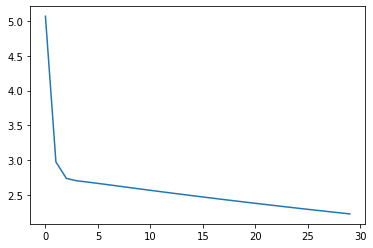

In [14]:
plt.plot(cost)